In [2]:
%matplotlib inline

In [3]:
import xlrd
import os 
import sqlite3
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
db_path = '../datasets/datawarehouse.db'

### Cost of AirBnB using listings

In [5]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(REPLACE(price, '$', '') AS FLOAT) as avg_price
FROM listings;
'''

cur.execute(query)
con.commit()

price_arr = cur.fetchall()

con.close()

In [6]:
cost_arr = []
for pairs in price_arr:
    cost_arr.append(pairs[1])

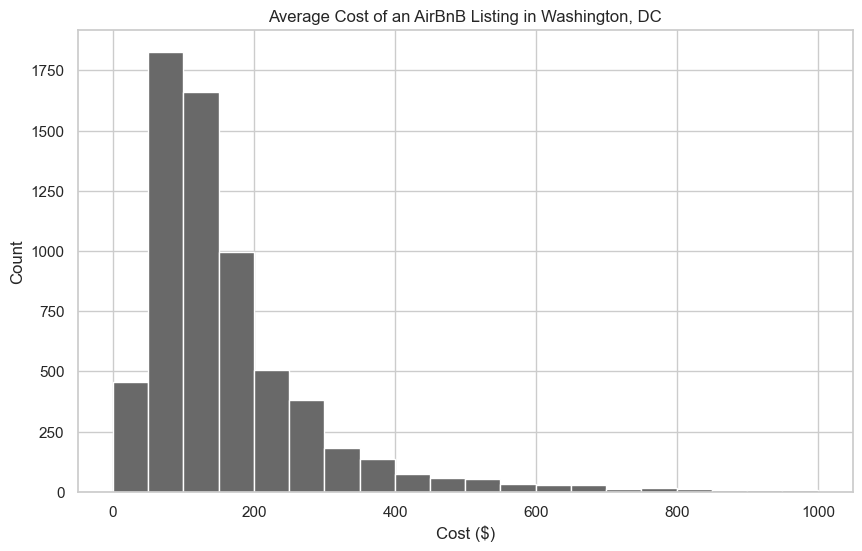

In [7]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist(cost_arr, color="dimgray", bins=20)
axes.set_ylabel( "Count")
axes.set_xlabel( "Cost ($)")
axes.set_title( "Average Cost of an AirBnB Listing in Washington, DC")

plt.show()
plt.close()

### Neighborhood groups

The neighborhood group variable is a categorical value. 

In [59]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT neighbourhood_cleansed, COUNT(*) as neighborhood_count
FROM listings
GROUP BY neighbourhood_cleansed
ORDER BY neighborhood_count DESC;
'''

cur.execute(query)
con.commit()

neighborhood = cur.fetchall()

con.close()

In [60]:
neighborhood_names = [n[0] for n in neighborhood] 
neighborhood_count = [n[1] for n in neighborhood]

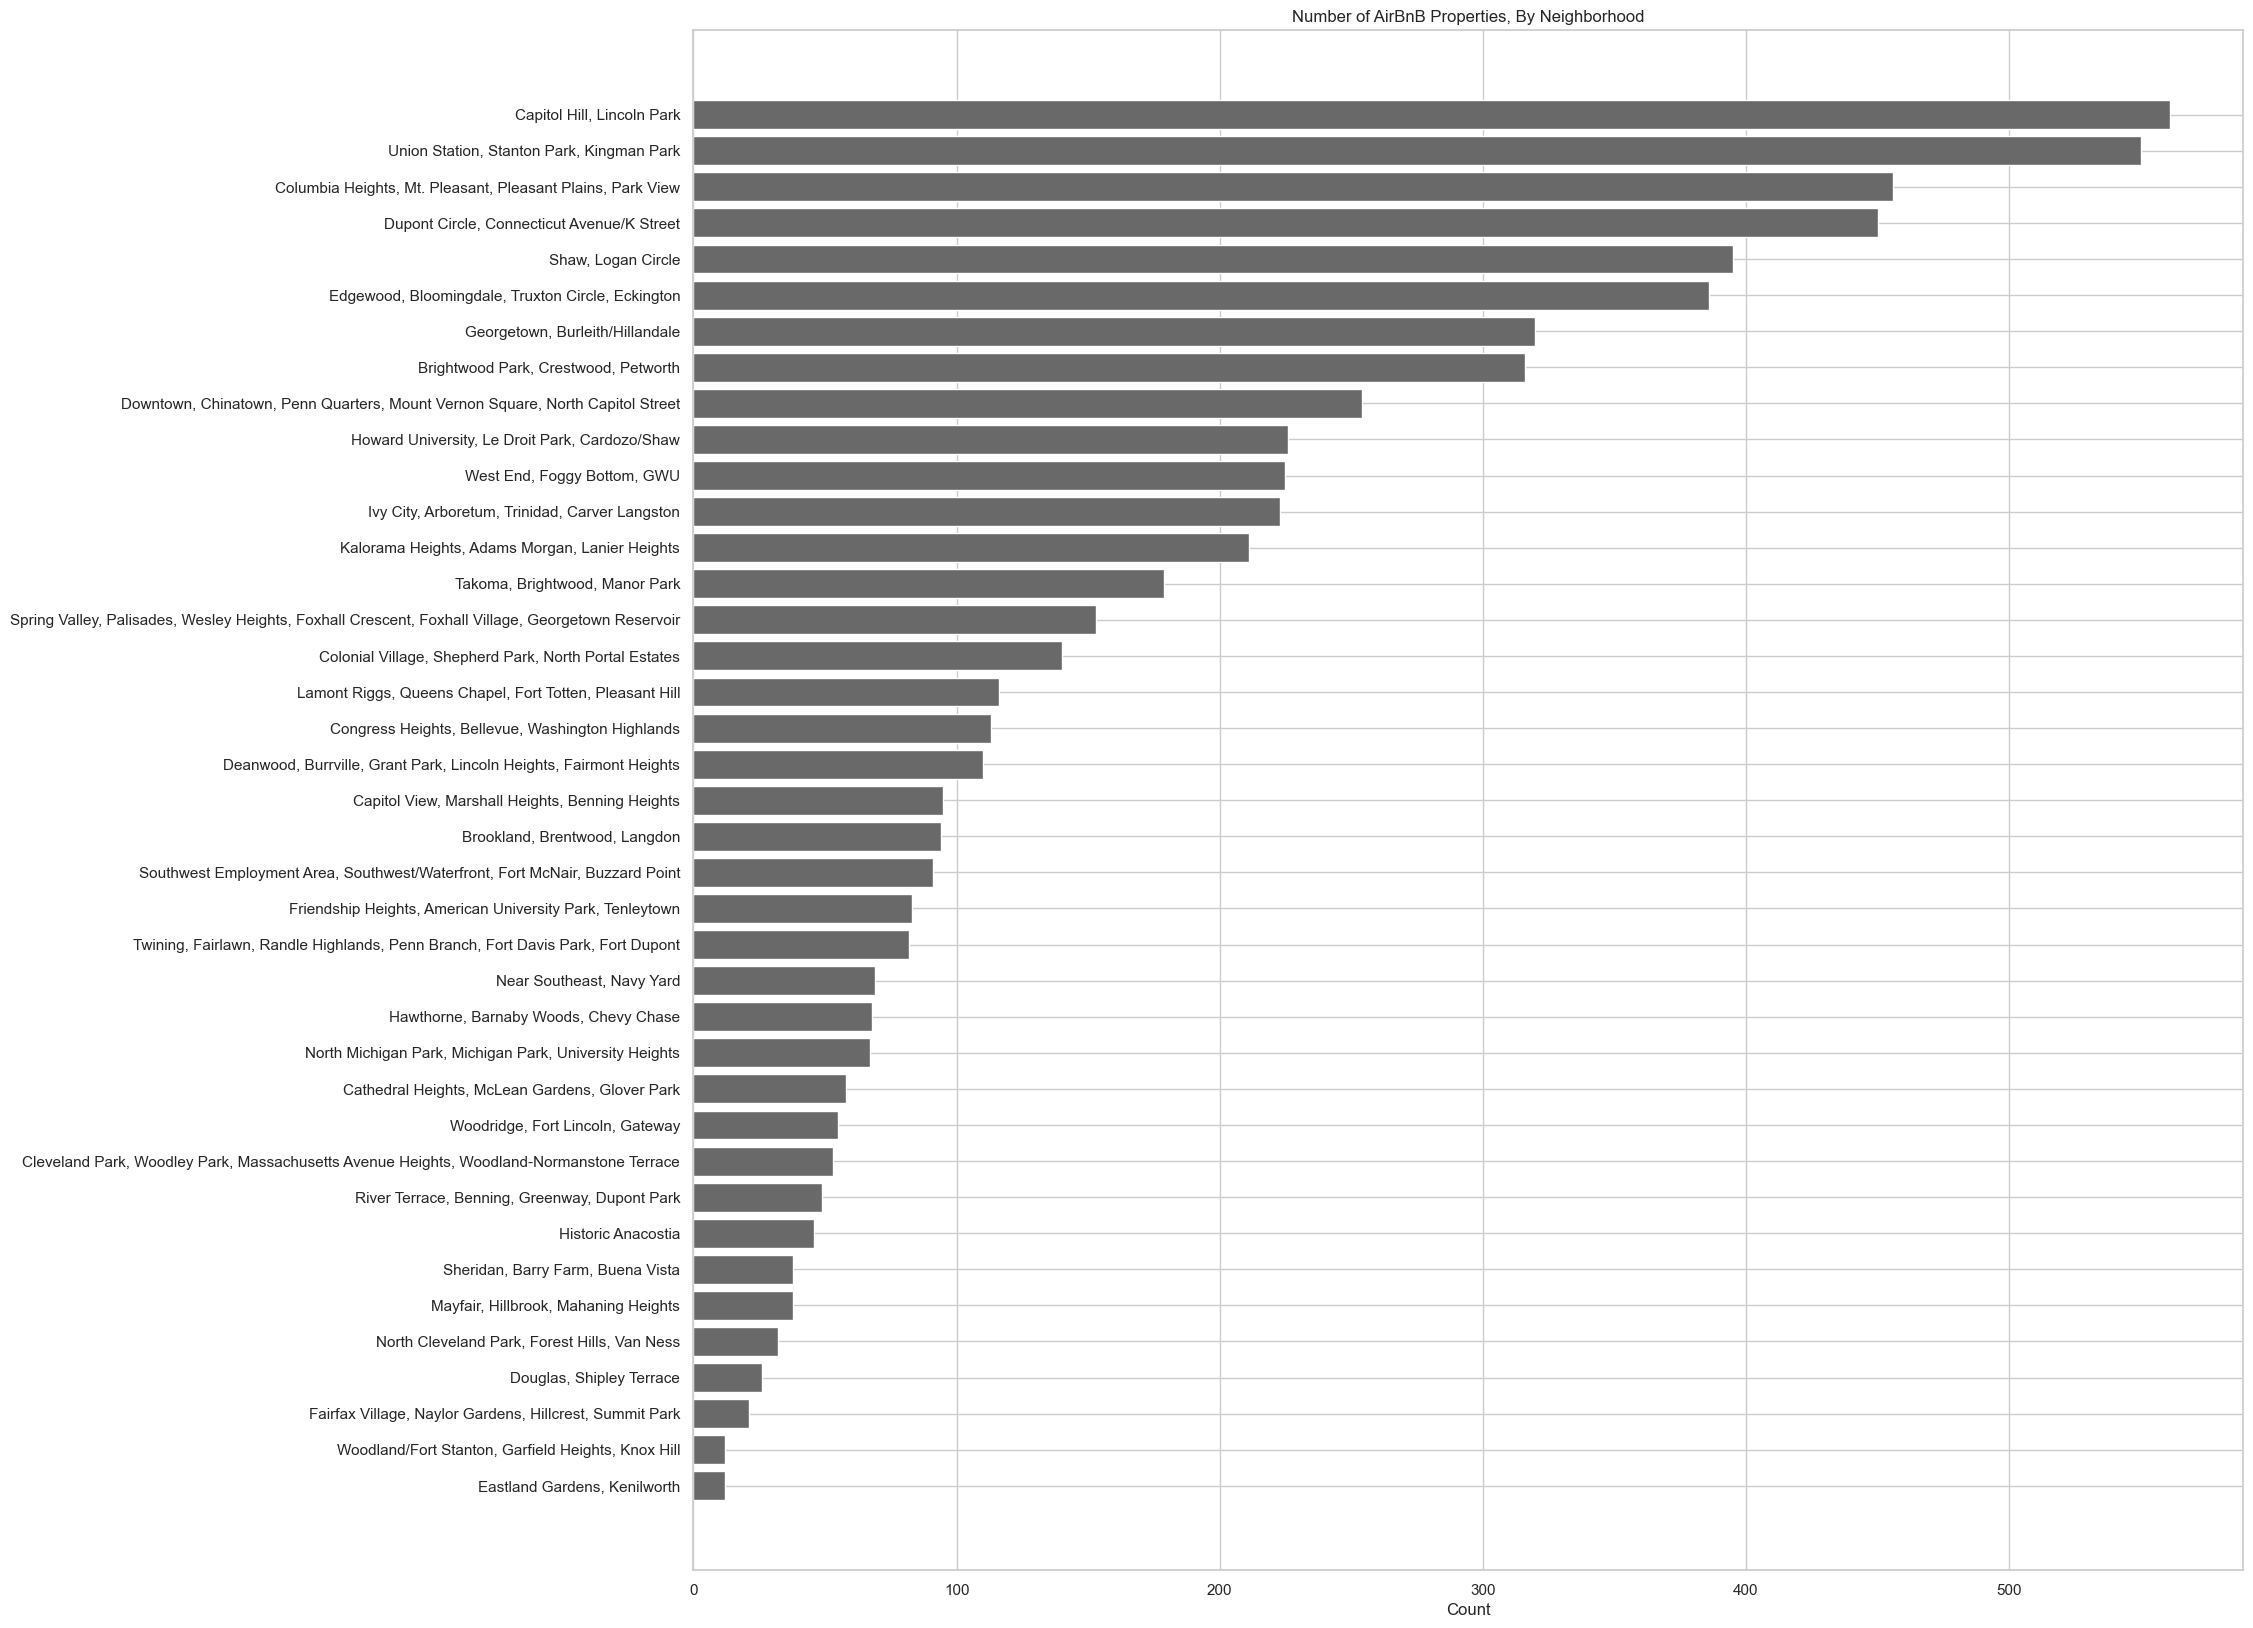

In [61]:
figure = plt.figure(figsize=(20, 20)) # first element is width, second is height.

y_pos = np.arange(len(neighborhood_names))
axes = figure.add_subplot(1, 1, 1)

axes.barh(y_pos, neighborhood_count, color="dimgray")
axes.set_title( "Number of AirBnB Properties, By Neighborhood")
axes.set_yticks(y_pos)
axes.set_yticklabels(neighborhood_names)
axes.invert_yaxis()
axes.set_xlabel('Count')



plt.show()
plt.close()

### Number of bathrooms

In [62]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT bathrooms_text, COUNT(*) as num_bath
FROM listings
GROUP BY bathrooms_text
ORDER BY num_bath DESC;
'''

cur.execute(query)
con.commit()

bathroom = cur.fetchall()

con.close()

In [63]:
bathroom_type = [b[0] for b in bathroom]
bathroom_count = [b[1] for b in bathroom]

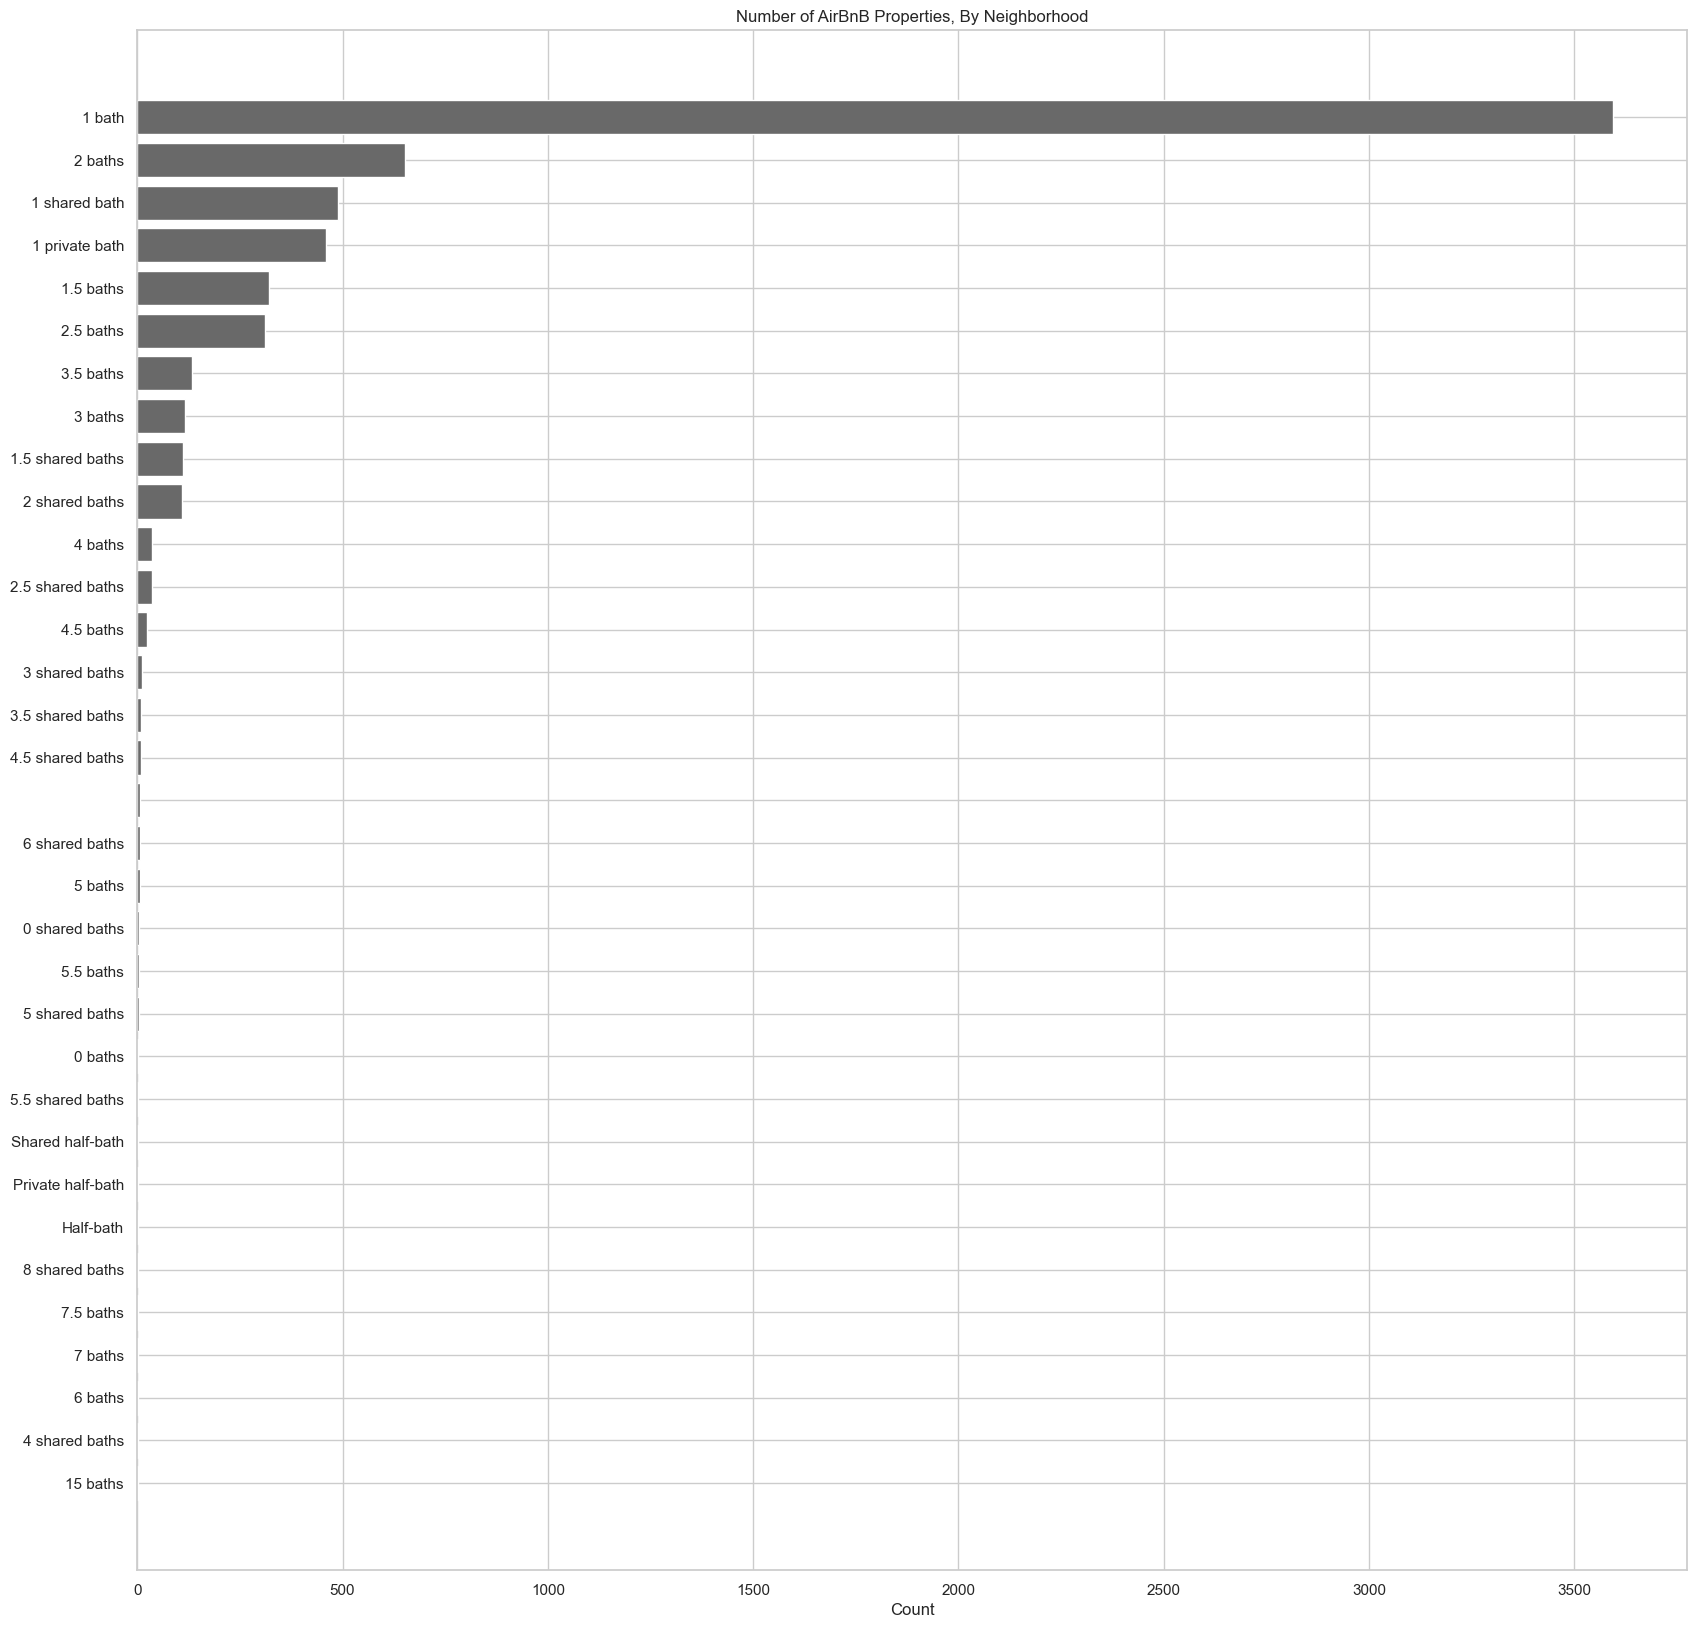

In [64]:
figure = plt.figure(figsize=(20, 20)) # first element is width, second is height.

y_pos = np.arange(len(bathroom_type))
axes = figure.add_subplot(1, 1, 1)

axes.barh(y_pos, bathroom_count, color="dimgray")
axes.set_title( "Number of AirBnB Properties, By Neighborhood")
axes.set_yticks(y_pos)
axes.set_yticklabels(bathroom_type)
axes.invert_yaxis()
axes.set_xlabel('Count')



plt.show()
plt.close()

In [65]:
bathroom_str = np.unique(bathroom_type)
print(bathroom_str)

['' '0 baths' '0 shared baths' '1 bath' '1 private bath' '1 shared bath'
 '1.5 baths' '1.5 shared baths' '15 baths' '2 baths' '2 shared baths'
 '2.5 baths' '2.5 shared baths' '3 baths' '3 shared baths' '3.5 baths'
 '3.5 shared baths' '4 baths' '4 shared baths' '4.5 baths'
 '4.5 shared baths' '5 baths' '5 shared baths' '5.5 baths'
 '5.5 shared baths' '6 baths' '6 shared baths' '7 baths' '7.5 baths'
 '8 shared baths' 'Half-bath' 'Private half-bath' 'Shared half-bath']


In [66]:
'''
Limit the number of bath categories
'''
bathroom_dict = {}
def getNewBathroomCat(s):
    str_elements = s.split(' ')
    bath_cat = ''
    if str_elements[0] == '':
        bath_cat = 'No Bath'
    elif str_elements[0] == 'Half-bath':
        bath_cat = '1 Private'
    elif str_elements[0] == '0':
        bath_cat = 'No Bath'
    else:
        try:
            num_bath = float(str_elements[0])
            if num_bath >= 3:
                bath_cat = '3+'
            elif num_bath >= 2:
                bath_cat = '2'
            else:
                bath_cat = '1'
            if str_elements[1] == 'shared':
                bath_cat += ' Shared'
            else:
                bath_cat += ' Private'
        except:
            if str_elements[0] == 'Private':
                bath_cat = '1 Private'
            elif str_elements[0] == 'Shared':
                bath_cat = '1 Shared'
    return bath_cat
    
for ind in range(0, len(bathroom_type)):
    s = bathroom_type[ind]
    c = bathroom_count[ind]
    
    bath_type = getNewBathroomCat(s)

    if bath_type not in bathroom_dict:
        bathroom_dict[bath_type] = c
    else:
        bathroom_dict[bath_type] +=c

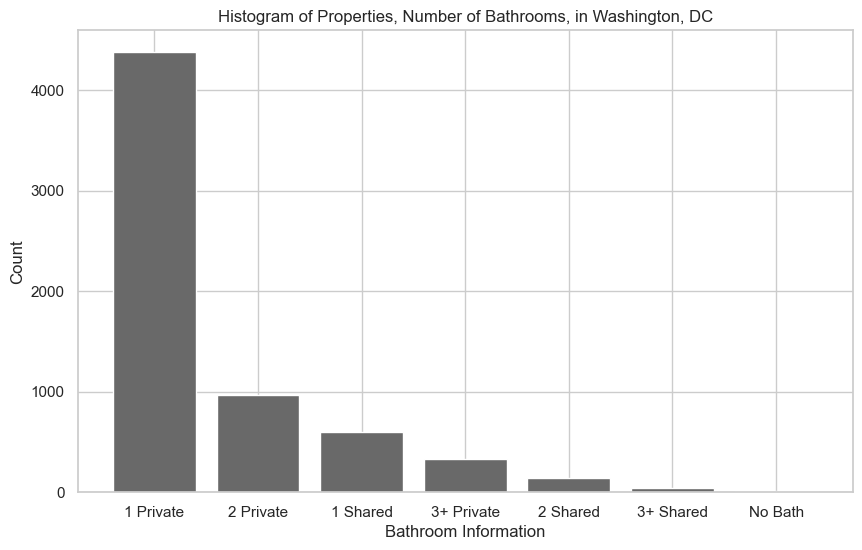

In [71]:

figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)
xpos = [val for val in range(1, len(bathroom_dict.values())+1)]

axes.bar(xpos, height=bathroom_dict.values(), color="dimgray")
axes.set_xticks(xpos)
axes.set_xticklabels(bathroom_dict.keys())
axes.set_ylabel( "Count")
axes.set_xlabel( "Bathroom Information")
axes.set_title( "Histogram of Properties, Number of Bathrooms, in Washington, DC")

plt.show()
plt.close()

### "Is Superhost" query

In [72]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, host_is_superhost
FROM listings
GROUP BY id;
'''

cur.execute(query)
con.commit()

superhost = cur.fetchall()

con.close()

### Host total listings

In [76]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, host_total_listings_count
FROM listings
GROUP BY id;
'''

cur.execute(query)
con.commit()

host_listings = cur.fetchall()

con.close()

### Secondary data source

In [158]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT * FROM property_info
WHERE PROPTYPE LIKE '%Residential-Single Family%'
AND ASSESSMENT < 5000000
AND ASSESSMENT > 49999;'''

cur.execute(query)
con.commit()

property_info = cur.fetchall()

In [159]:
prop_type = []
nbhd = []
assessment = []
for vals in property_info:
    prop_type.append(vals[0])
    nbhd.append(vals[1])
    assessment.append(vals[2])

In [160]:
import pandas as pd
prop_df = pd.DataFrame({'prop_type': prop_type,
                       'nbhd': nbhd,
                       'assessment': assessment})
prop_df.prop_type.unique()

array(['Residential-Single Family (Det', 'Residential-Single Family (Sem',
       'Residential-Single Family (Row', 'Residential-Single Family (NC)',
       'Residential-Single Family (Mis'], dtype=object)

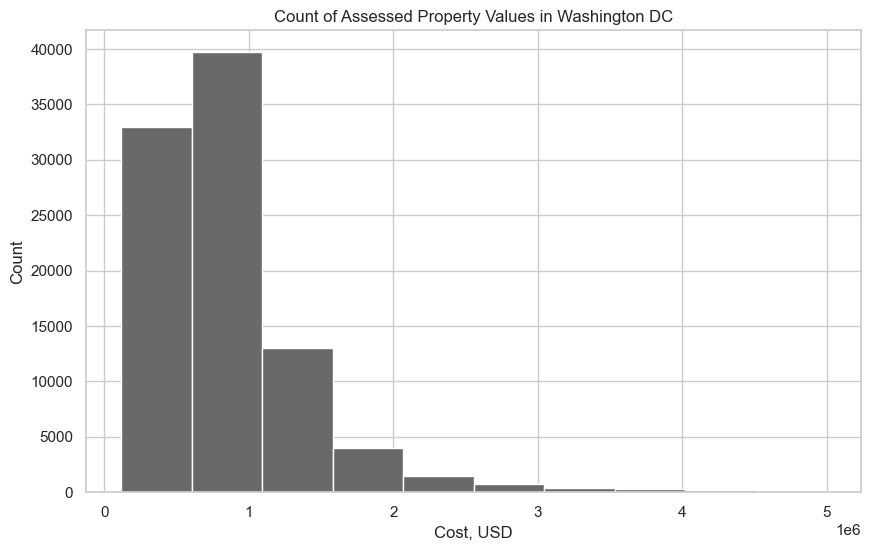

In [161]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist(prop_df.assessment, color="dimgray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Cost, USD")
axes.set_title( "Count of Assessed Property Values in Washington DC")

plt.show()
plt.close()

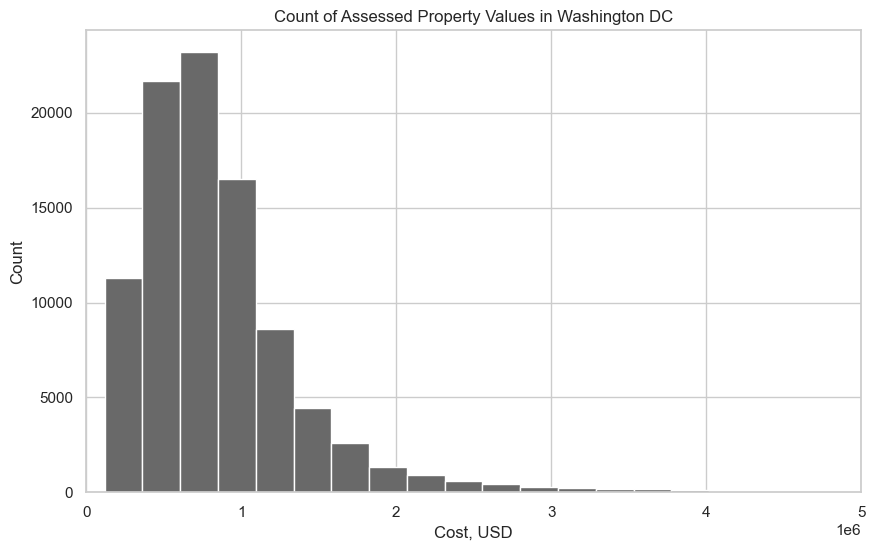

In [162]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist(prop_df.assessment, color="dimgray", bins=20)
axes.set_ylabel( "Count")
axes.set_xlabel( "Cost, USD")
axes.set_xlim([0,5000000])
axes.set_title( "Count of Assessed Property Values in Washington DC")

plt.show()
plt.close()